<a href="https://colab.research.google.com/github/Santhoshi2003/Technohack_Internship/blob/main/fraud_detection(techohack).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install chart-studio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

In [3]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
data1= data.sample(frac = 0.1,random_state=1)
data1.shape

(397, 31)

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


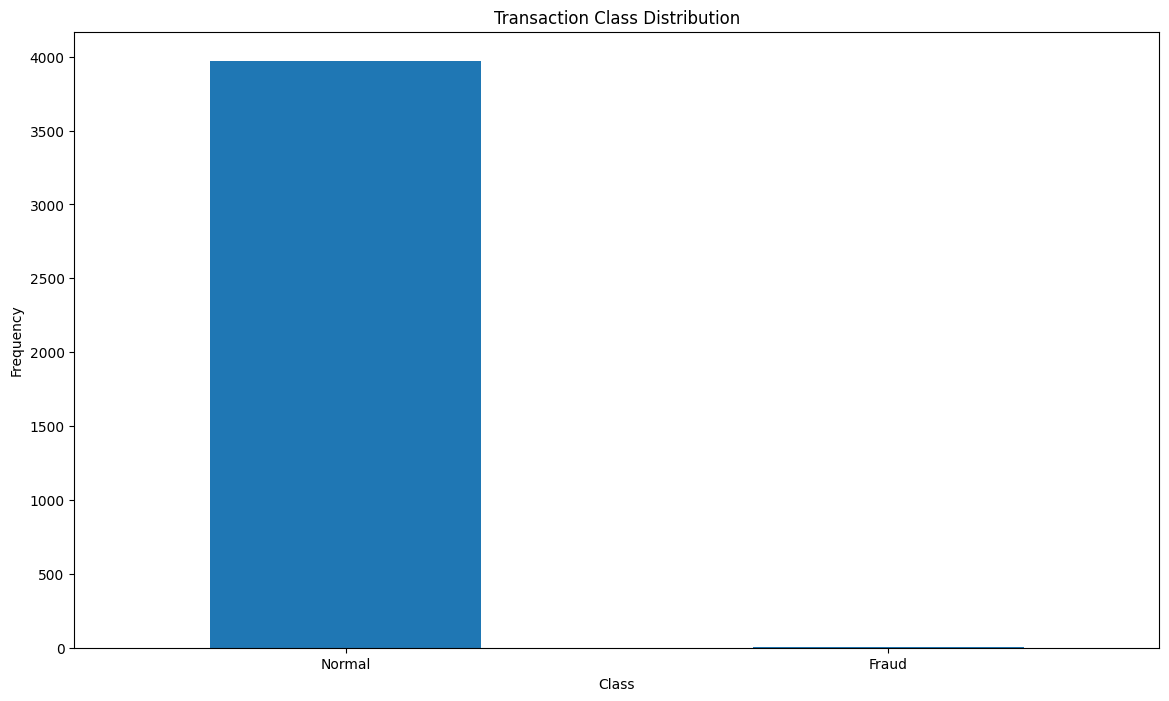

In [7]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
Normal = data[data['Class']==0]
Fraud = data[data['Class']==1]

In [9]:
Normal.shape

(3970, 31)

In [10]:
Fraud.shape

(2, 31)

In [11]:
Normal.Amount.describe()

count    3970.000000
mean       64.899597
std       213.612570
min         0.000000
25%         2.270000
50%        12.990000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [12]:
Fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

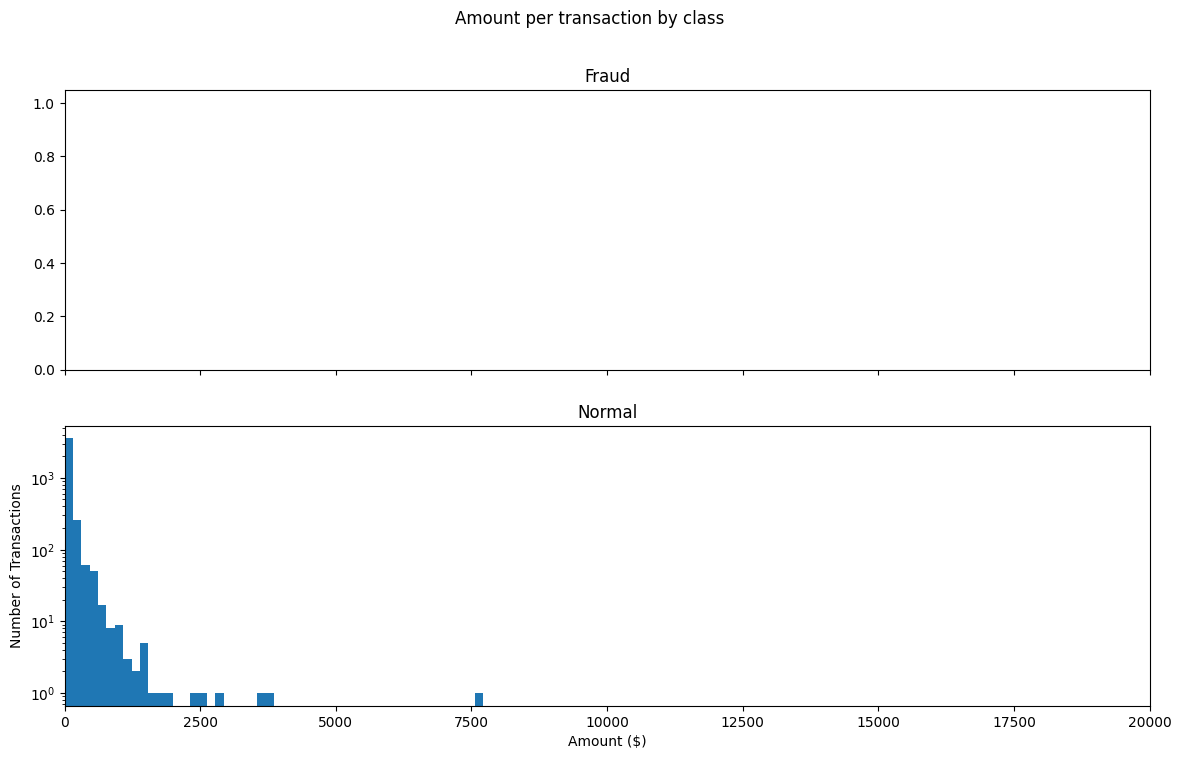

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

**Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.**

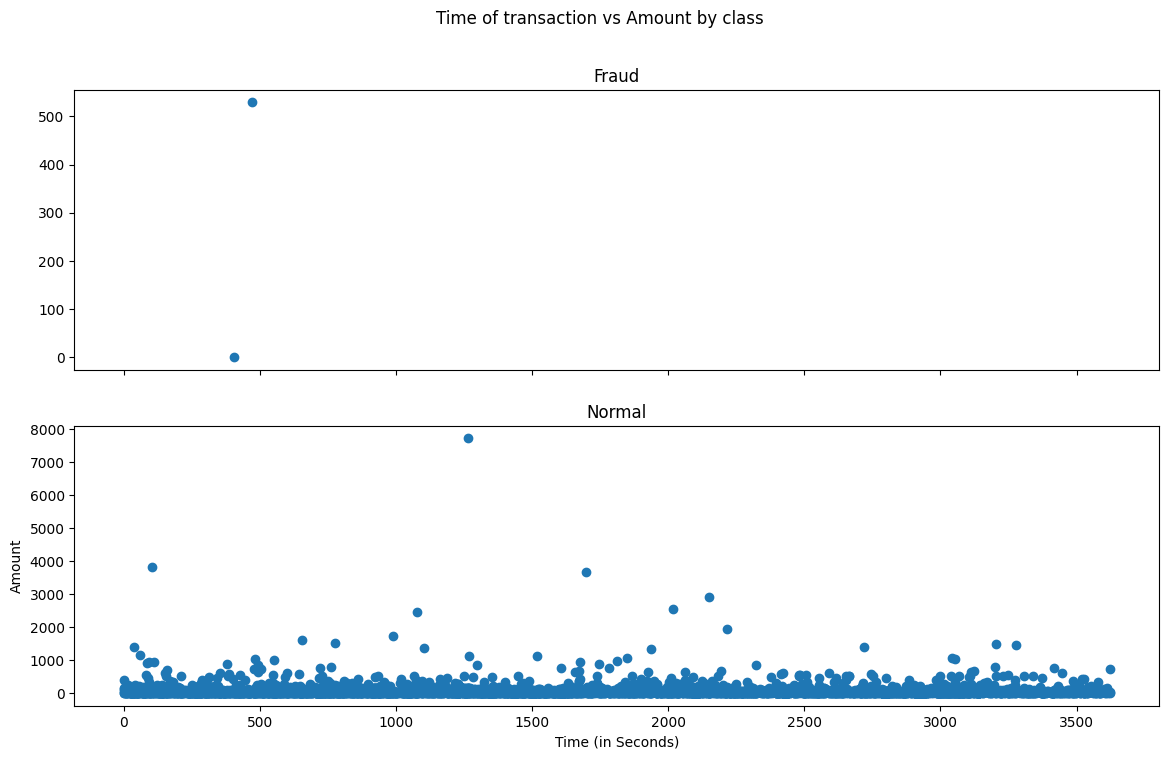

In [14]:
#Graphical representation of the data

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();

In [15]:
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)


In [16]:
# Create a trace

trace = go.Scatter(
    x = Fraud.Time,
    y = Fraud.Amount,
    mode = 'markers'
)
data = [trace]

plotly.offline.iplot({
    "data": data
})

 Now let us take a sample of the dataset for out modelling and prediction


In [ ]:
data1.shape

(199, 31)

In [ ]:
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.005050505050505051
Fraud Cases : 1
Valid Cases : 198


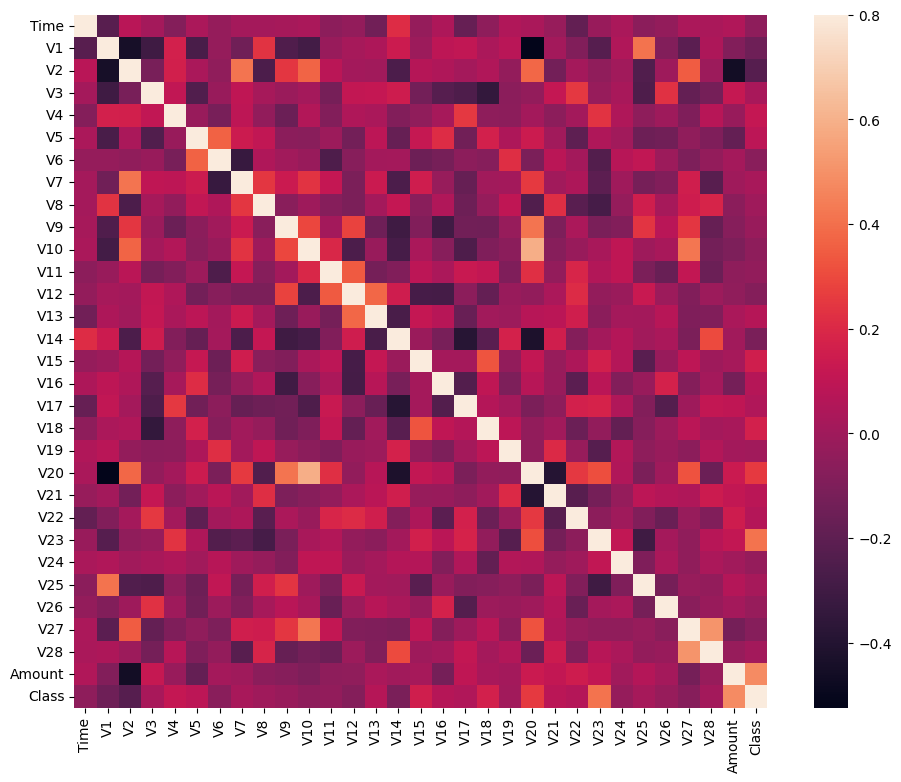

In [ ]:
correlation_matrix = data1.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

The above correlation matrix shows that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

In [ ]:
#Get all the columns from the dataframe

columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(199, 30)
(199,)


In [ ]:
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                         max_iter=-1)
}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(novelty=False)  # Set novelty to False
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        if clf_name == "Isolation Forest":
            # Use Isolation Forest with a contamination value of 0.05
            clf = IsolationForest(contamination=0.05)
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()

    # Run Classification Metrics
    print("{}: {}".format(clf_name, n_errors))
    print("Accuracy Score:")
    print(accuracy_score(Y, y_pred))
    print("Classification Report:")
    print(classification_report(Y, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Isolation Forest: 9
Accuracy Score:
0.9547738693467337
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98       198
         1.0       0.10      1.00      0.18         1

    accuracy                           0.95       199
   macro avg       0.55      0.98      0.58       199
weighted avg       1.00      0.95      0.97       199

Local Outlier Factor: 6
Accuracy Score:
0.9698492462311558
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       198
         1.0       0.14      1.00      0.25         1

    accuracy                           0.97       199
   macro avg       0.57      0.98      0.62       199
weighted avg       1.00      0.97      0.98       199

Support Vector Machine: 126
Accuracy Score:
0.36683417085427134
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.36      0.53 